## [Experiment] Sample notebook to see before and after prerproc

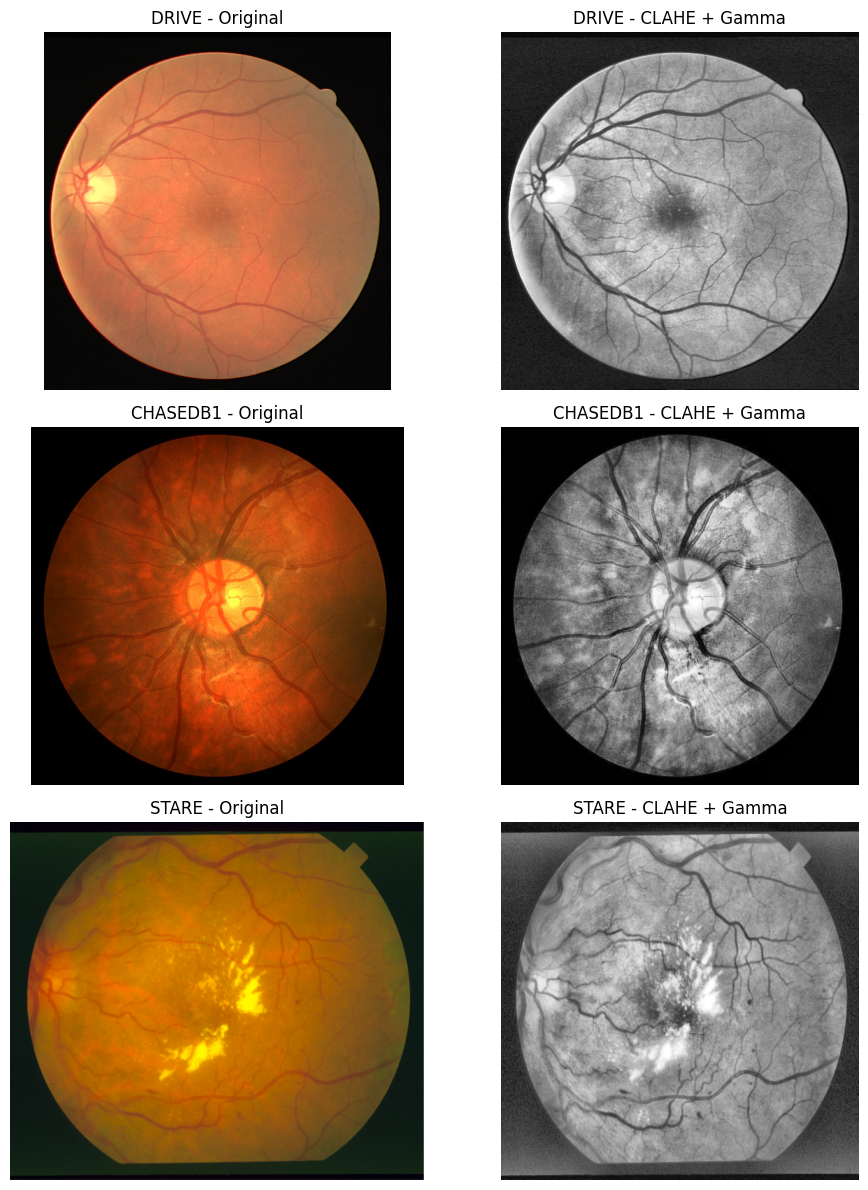

In [ ]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../")  # so Python can see 'src' directory

from src.data.preprocessing import preprocess_image_clahe
import matplotlib.pyplot as plt
import cv2

# sample image paths (keep both occluded + clean)
images = [
    ("DRIVE (occlusion)", "../data/raw/DRIVE/training/images/26_training.png"),
    ("CHASEDB1 (occlusion)", "../data/raw/CHASEDB1/training/images/Image_05L.jpg"),
    ("STARE (occlusion)", "../data/raw/STARE/training/images/image 0005.jpg"),
    ("DRIVE (clean)", "../data/raw/DRIVE/training/images/21_training.png"),
    ("CHASEDB1 (clean)", "../data/raw/CHASEDB1/training/images/Image_01L.jpg"),
    ("STARE (clean)", "../data/raw/STARE/training/images/image 0001.jpg")
]

# create figure: 6 rows × 2 cols
plt.figure(figsize=(10, 18))

for idx, (label, image_path) in enumerate(images):
    # Preprocess
    processed = preprocess_image_clahe(image_path)

    # Load original RGB
    original = cv2.imread(image_path)
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    # Original image
    plt.subplot(len(images), 2, idx*2 + 1)
    plt.imshow(original_rgb)
    plt.title(f"{label} - Original")
    plt.axis("off")

    # Processed image
    plt.subplot(len(images), 2, idx*2 + 2)
    plt.imshow(processed[0], cmap="gray")
    plt.title(f"{label} - CLAHE + Gamma")
    plt.axis("off")

plt.tight_layout()
plt.show()
